# 0. Setup Paths

In [172]:
import os
!cat /etc/os-release
!uname -m
import tensorflow as tf
print(tf.__version__)

NAME="Ubuntu"
VERSION="20.04.5 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.5 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal
x86_64
2.13.0


In [173]:
CUSTOM_MODEL_NAME = 'my_ssd_mobilenet_v2_fpnlite_320x320' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [174]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [175]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [176]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [71]:
# clone tensorflow model API https://github.com/tensorflow/models.git
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
!apt-get install protobuf-compiler -y
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libprotobuf-dev libprotobuf-lite17 libprotobuf17 libprotoc17
The following NEW packages will be installed:
  libprotobuf-dev libprotobuf-lite17 libprotobuf17 libprotoc17
  protobuf-compiler
0 upgraded, 5 newly installed, 0 to remove and 96 not upgraded.
Need to get 2760 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf-lite17 amd64 3.6.1.3-2ubuntu5.2 [132 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf17 amd64 3.6.1.3-2ubuntu5.2 [798 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotoc17 amd64 3.6.1.3-2ubuntu5.2 [646 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf-dev amd64 3.6.1.3-2ubuntu5.2 [1156 kB]
Get:5 http://archive.ubuntu.com/ubuntu 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 49.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 112.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 80.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.0/619.0 kB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 133.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 64.6 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 130.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 103.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 115.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 40.3 MB/s eta 0:00:00


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696994 sha256=c19cb207c37a321b4a38ee573db2ba7fbd5ce471f11047cdd4730f3dca4a1c17
  Stored in directory: /tmp/pip-ephem-wheel-cache-kjk192kk/wheels/4e/dc/ef/bedf2bfbde4066a6000260cee7f357cca24bd684c6dfebb4aa
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44008 sha256=395a0594b02fe1fe0e8e625cfd3989551fb6783f2b912a893c95d048ded4e3b4
  Stored in directory: /root/.cache/pip/wheels/b0/49/56/bc5c2dc656062f0d08924771916c67e3202b6d2c415dcb7398
  Created wheel for crcmod: filename=crcmod-1.7-cp38-cp38-linux_x86_64.whl size=36028 sha256=e7995232ebb509af74f21521fd061a5e90c43b6b315fa49bb3a30ec0d6043024
  Stored in directory: /root/.cache/pip/wheels/f2/92/c3/6adef042a5224686e4ebdb9389aa568f1943c67abd8e05f7b9
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78542 sha256=71afc5a315288a13f6aad70ae0706d0f13c1bcfdf57ad2c91fe196097ff1cd83
  Stored in directory

In [72]:
import object_detection
import tensorflow as tf
print(tf.__version__)
print(object_detection.__file__)

2.13.0
/usr/local/lib/python3.8/dist-packages/object_detection/__init__.py


In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [74]:
!pip list

Package                       Version
----------------------------- --------------------------
absl-py                       1.0.0
apache-beam                   2.49.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        6.0.0
cachetools                    5.2.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
clang                         13.0.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.4
contextlib2                   21.6.0
contourpy                     1.0.6
crcmod                        1.7
cubinlinker                   0.2.2+2.g8e13447
cuda-python        

In [75]:
# download pretained model - ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-08-25 11:33:26--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.209.144, 2a00:1450:4005:801::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.209.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  26.9MB/s    in 0.7s    

2023-08-25 11:33:27 (26.9 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_

# 2. Create Label Map

In [177]:
# label_map.pbtxt
labels = [{'name':'animal', 'id':1}, {'name':'flat.driveable_surface', 'id':2}, {'name':'human.pedestrian.adult', 'id':3}, {'name':'human.pedestrian.child', 'id':4}, {'name':'human.pedestrian.construction_worker', 'id':5}, {'name':'human.pedestrian.personal_mobility', 'id':6}, {'name':'human.pedestrian.police_officer', 'id':7}, {'name':'human.pedestrian.stroller', 'id':8}, {'name':'human.pedestrian.wheelchair', 'id':9}, {'name':'movable_object.barrier', 'id':10}, {'name':'movable_object.debris', 'id':11}, {'name':'movable_object.pushable_pullable', 'id':12}, {'name':'movable_object.trafficcone', 'id':13}, {'name':'static_object.bicycle_rack', 'id':14}, {'name':'vehicle.bicycle', 'id':15}, {'name':'vehicle.bus.bendy', 'id':16}, {'name':'vehicle.bus.rigid', 'id':17}, {'name':'vehicle.car', 'id':18}, {'name':'vehicle.construction', 'id':19}, {'name':'vehicle.ego', 'id':20}, {'name':'vehicle.emergency.ambulance', 'id':21}, {'name':'vehicle.emergency.police', 'id':22}, {'name':'vehicle.motorcycle', 'id':23}, {'name':'vehicle.trailer', 'id':24}, {'name':'vehicle.truck', 'id':25}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [77]:
# generate_tfrecord.py
if not os.path.exists(os.path.join(paths['SCRIPTS_PATH'], 'generate_tfrecord.py')):
    !wget https://raw.githubusercontent.com/nicknochnack/GenerateTFRecord/main/generate_tfrecord.py -P {paths['SCRIPTS_PATH']}


In [78]:
#create TFrecord - val.record and train.record - from .xml annotation files
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'val')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'val.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/val.record


In [79]:
# understanding tfrecord
filenames = "/workspace/TFOD_nuScenes/Tensorflow/workspace/annotations/val.record"
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
print(example)

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\003\204\006@\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\247

# 4. Copy Model Config to Training Folder

In [178]:
# copy pipeline.config from ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 to TFOD_nuScenes/Tensorflow/workspace/models/my_ssd_mobnet
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [179]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [180]:
#use config_util function from object_detection module to get configs from pipeline.config 
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [181]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [182]:
#read pipeline.config file from TFOD_nuScenes/Tensorflow/workspace/models/my_ssd_mobnet and merge with configuration class 'TrainEvalPipelineConfig'
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [183]:
#update the configuration with corresponding config variables
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'val.record')]

In [184]:
#write the updated variables into pipeline.config file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [126]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [127]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [185]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [186]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_320x320 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_320x320/pipeline.config --num_train_steps=5000


In [187]:
!{command}

2023-09-13 10:03:55.469338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 10:03:59.791413: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0913 10:03:59.801847 140511733516096 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting 

INFO:tensorflow:Step 100 per-step time 0.600s
I0913 10:05:39.878894 140511733516096 model_lib_v2.py:705] Step 100 per-step time 0.600s
INFO:tensorflow:{'Loss/classification_loss': 0.811776,
 'Loss/localization_loss': 0.8715147,
 'Loss/regularization_loss': 0.15584148,
 'Loss/total_loss': 1.8391321,
 'learning_rate': 0.0319994}
I0913 10:05:39.879630 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.811776,
 'Loss/localization_loss': 0.8715147,
 'Loss/regularization_loss': 0.15584148,
 'Loss/total_loss': 1.8391321,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 0.281s
I0913 10:06:07.938460 140511733516096 model_lib_v2.py:705] Step 200 per-step time 0.281s
INFO:tensorflow:{'Loss/classification_loss': 0.7956346,
 'Loss/localization_loss': 0.8389335,
 'Loss/regularization_loss': 0.15619503,
 'Loss/total_loss': 1.7907631,
 'learning_rate': 0.0373328}
I0913 10:06:07.939059 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.7956346,
 'Los

INFO:tensorflow:Step 1600 per-step time 0.261s
I0913 10:12:30.537332 140511733516096 model_lib_v2.py:705] Step 1600 per-step time 0.261s
INFO:tensorflow:{'Loss/classification_loss': 1.1641536,
 'Loss/localization_loss': 0.7408693,
 'Loss/regularization_loss': 0.15847234,
 'Loss/total_loss': 2.0634952,
 'learning_rate': 0.079970405}
I0913 10:12:30.537657 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 1.1641536,
 'Loss/localization_loss': 0.7408693,
 'Loss/regularization_loss': 0.15847234,
 'Loss/total_loss': 2.0634952,
 'learning_rate': 0.079970405}
INFO:tensorflow:Step 1700 per-step time 0.289s
I0913 10:12:59.436860 140511733516096 model_lib_v2.py:705] Step 1700 per-step time 0.289s
INFO:tensorflow:{'Loss/classification_loss': 0.62111765,
 'Loss/localization_loss': 0.74735034,
 'Loss/regularization_loss': 0.15856043,
 'Loss/total_loss': 1.5270283,
 'learning_rate': 0.07995972}
I0913 10:12:59.437160 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.6

INFO:tensorflow:Step 3100 per-step time 0.272s
I0913 10:19:23.469564 140511733516096 model_lib_v2.py:705] Step 3100 per-step time 0.272s
INFO:tensorflow:{'Loss/classification_loss': 0.48618427,
 'Loss/localization_loss': 0.6192036,
 'Loss/regularization_loss': 0.15272047,
 'Loss/total_loss': 1.2581084,
 'learning_rate': 0.07963799}
I0913 10:19:23.469873 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.48618427,
 'Loss/localization_loss': 0.6192036,
 'Loss/regularization_loss': 0.15272047,
 'Loss/total_loss': 1.2581084,
 'learning_rate': 0.07963799}
INFO:tensorflow:Step 3200 per-step time 0.266s
I0913 10:19:50.077470 140511733516096 model_lib_v2.py:705] Step 3200 per-step time 0.266s
INFO:tensorflow:{'Loss/classification_loss': 0.52454793,
 'Loss/localization_loss': 0.454611,
 'Loss/regularization_loss': 0.15216741,
 'Loss/total_loss': 1.1313263,
 'learning_rate': 0.07960275}
I0913 10:19:50.077768 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.524

INFO:tensorflow:Step 4600 per-step time 0.277s
I0913 10:26:07.299919 140511733516096 model_lib_v2.py:705] Step 4600 per-step time 0.277s
INFO:tensorflow:{'Loss/classification_loss': 0.43769228,
 'Loss/localization_loss': 0.5258685,
 'Loss/regularization_loss': 0.14518996,
 'Loss/total_loss': 1.1087507,
 'learning_rate': 0.078939244}
I0913 10:26:07.300240 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.43769228,
 'Loss/localization_loss': 0.5258685,
 'Loss/regularization_loss': 0.14518996,
 'Loss/total_loss': 1.1087507,
 'learning_rate': 0.078939244}
INFO:tensorflow:Step 4700 per-step time 0.279s
I0913 10:26:35.152119 140511733516096 model_lib_v2.py:705] Step 4700 per-step time 0.279s
INFO:tensorflow:{'Loss/classification_loss': 0.46960428,
 'Loss/localization_loss': 0.5707273,
 'Loss/regularization_loss': 0.1447829,
 'Loss/total_loss': 1.1851145,
 'learning_rate': 0.07887978}
I0913 10:26:35.152439 140511733516096 model_lib_v2.py:708] {'Loss/classification_loss': 0.4

# 7. Evaluate the Model

In [188]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [189]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_320x320 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_320x320/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_320x320


In [190]:
!{command}

2023-09-13 11:07:08.707709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 11:07:13.006668: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
W0913 11:07:13.011597 139686211999552 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0913 11:07:13.011915 139686211999552 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examp

INFO:tensorflow:Finished eval step 100
I0913 11:08:03.758153 139686211999552 model_lib_v2.py:966] Finished eval step 100
INFO:tensorflow:Finished eval step 200
I0913 11:08:07.803478 139686211999552 model_lib_v2.py:966] Finished eval step 200
INFO:tensorflow:Finished eval step 300
I0913 11:08:12.256690 139686211999552 model_lib_v2.py:966] Finished eval step 300
INFO:tensorflow:Finished eval step 400
I0913 11:08:16.079698 139686211999552 model_lib_v2.py:966] Finished eval step 400
INFO:tensorflow:Finished eval step 500
I0913 11:08:20.126795 139686211999552 model_lib_v2.py:966] Finished eval step 500
INFO:tensorflow:Finished eval step 600
I0913 11:08:23.862186 139686211999552 model_lib_v2.py:966] Finished eval step 600
INFO:tensorflow:Finished eval step 700
I0913 11:08:27.524858 139686211999552 model_lib_v2.py:966] Finished eval step 700
INFO:tensorflow:Finished eval step 800
I0913 11:08:31.772484 139686211999552 model_lib_v2.py:966] Finished eval step 800
INFO:tensorflow:Finished eval st

INFO:tensorflow:Finished eval step 6800
I0913 11:12:18.786067 139686211999552 model_lib_v2.py:966] Finished eval step 6800
INFO:tensorflow:Finished eval step 6900
I0913 11:12:23.511251 139686211999552 model_lib_v2.py:966] Finished eval step 6900
INFO:tensorflow:Finished eval step 7000
I0913 11:12:27.086777 139686211999552 model_lib_v2.py:966] Finished eval step 7000
INFO:tensorflow:Finished eval step 7100
I0913 11:12:30.672092 139686211999552 model_lib_v2.py:966] Finished eval step 7100
INFO:tensorflow:Finished eval step 7200
I0913 11:12:34.260097 139686211999552 model_lib_v2.py:966] Finished eval step 7200
INFO:tensorflow:Finished eval step 7300
I0913 11:12:37.850998 139686211999552 model_lib_v2.py:966] Finished eval step 7300
INFO:tensorflow:Finished eval step 7400
I0913 11:12:41.567411 139686211999552 model_lib_v2.py:966] Finished eval step 7400
INFO:tensorflow:Finished eval step 7500
I0913 11:12:45.209351 139686211999552 model_lib_v2.py:966] Finished eval step 7500
INFO:tensorflow:

INFO:tensorflow:Finished eval step 13500
I0913 11:16:35.099298 139686211999552 model_lib_v2.py:966] Finished eval step 13500
INFO:tensorflow:Finished eval step 13600
I0913 11:16:38.945670 139686211999552 model_lib_v2.py:966] Finished eval step 13600
INFO:tensorflow:Finished eval step 13700
I0913 11:16:42.928381 139686211999552 model_lib_v2.py:966] Finished eval step 13700
INFO:tensorflow:Finished eval step 13800
I0913 11:16:46.836958 139686211999552 model_lib_v2.py:966] Finished eval step 13800
INFO:tensorflow:Finished eval step 13900
I0913 11:16:50.666524 139686211999552 model_lib_v2.py:966] Finished eval step 13900
INFO:tensorflow:Finished eval step 14000
I0913 11:16:54.530257 139686211999552 model_lib_v2.py:966] Finished eval step 14000
INFO:tensorflow:Finished eval step 14100
I0913 11:16:58.393477 139686211999552 model_lib_v2.py:966] Finished eval step 14100
INFO:tensorflow:Finished eval step 14200
I0913 11:17:02.302875 139686211999552 model_lib_v2.py:966] Finished eval step 14200


# 8. Load Train Model From Checkpoint

In [191]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [192]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [193]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [194]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [198]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'n003-2018-01-02-11-48-43+0800__CAM_BACK_LEFT__1514864996198748.jpg')

In [199]:
IMAGE_PATH

'Tensorflow/workspace/images/test/n003-2018-01-02-11-48-43+0800__CAM_BACK_LEFT__1514864996198748.jpg'

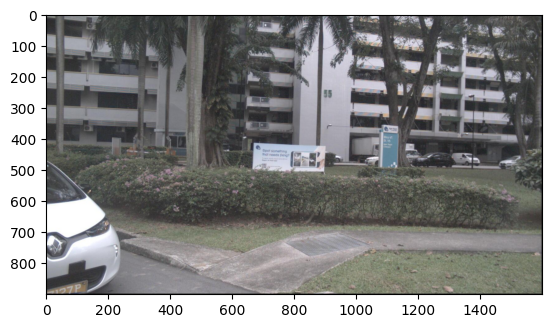

In [200]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()